In [1]:
# Python Packages Used in Analysis
import pandas as pd
import numpy as np
import scipy as sp

# Import libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This analysis is based on the Motor Vehicle Crashes information in New York state over a 3 year period
# (2014, 2015, 2016). 
# The 2 datasets used in the analysis are available at:
# https://data.ny.gov/Transportation/Motor-Vehicle-Crashes-Vehicle-Information-Three-Ye/xe9x-a24f
# https://data.ny.gov/Transportation/Motor-Vehicle-Crashes-Individual-Information-Three/ir4y-sesj

# The final dataset analyzed is obtained by merging the Vehicle Information and Individual information on the 
# Case Vehicle ID and contains information concerning both vehicle and individual involved in the crash.

### Questions that can be answered by the data analysis

In [3]:
# Questions to answer:
# 1. Does the number of occupants in the vehicle have an effect on the number of collisions ?
# 2. Do older vehicles cause more crashes and how does the rate compare to newer ones ?
# 2. What Action Prior to Accident leads to the most collisions and at what rate ?
# 4. Do pickup trucks cause more collisions ?

### Read the Vehicle Crash Information data into a pandas dataframe

In [4]:
dfv = pd.read_csv('./data/Motor_Vehicle_Crashes_-_Vehicle_Information__Three_Year_Window.csv')
dfv.shape

(1654482, 19)

In [7]:
#List column values
list(dfv.columns.values)

['Year',
 'Case Vehicle ID',
 'Vehicle Body Type',
 'Registration Class',
 'Action Prior to Accident',
 'Type / Axles of Truck or Bus',
 'Direction of Travel',
 'Fuel Type',
 'Vehicle Year',
 'State of Registration',
 'Number of Occupants',
 'Engine Cylinders',
 'Vehicle Make',
 'Contributing Factor 1',
 'Contributing Factor 1 Description',
 'Contributing Factor 2',
 'Contributing Factor 2 Description',
 'Event Type',
 'Partial VIN']

In [8]:
dfv.head()

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2016,13364291,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,Not Entered,West,Gas,2012.0,NY,1.0,4.0,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable,WMWZC3C57CWL81108
1,2016,13364304,PICKUP TRUCK,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,East,Gas,2014.0,NY,2.0,6.0,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,3GCUKREH8EG196335
2,2016,13364305,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2007.0,NY,1.0,4.0,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,1HGCM56387A220086
3,2016,13364307,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2011.0,NY,4.0,4.0,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown,2CNFLCEC1B6362978
4,2016,13364306,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2004.0,NY,1.0,6.0,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object",3G5DA03E04S597761


In [9]:
#finding the number of null values in each column
print(dfv.isnull().sum())

Year                                      0
Case Vehicle ID                           0
Vehicle Body Type                         0
Registration Class                        0
Action Prior to Accident                  0
Type / Axles of Truck or Bus              0
Direction of Travel                       0
Fuel Type                                 0
Vehicle Year                         258501
State of Registration                135907
Number of Occupants                  191761
Engine Cylinders                     345805
Vehicle Make                         257112
Contributing Factor 1                    29
Contributing Factor 1 Description        29
Contributing Factor 2                    28
Contributing Factor 2 Description        28
Event Type                            31436
Partial VIN                          298095
dtype: int64


### Read the Individual Crash Information data into a pandas dataframe

In [10]:
dfi = pd.read_csv('./data/Motor_Vehicle_Crashes_-_Individual_Information__Three_Year_Window.csv')
dfi.shape

(2221172, 15)

In [11]:
#List column values
list(dfi.columns.values)

['Year',
 'Case Individual ID',
 'Case Vehicle ID',
 'Victim Status',
 'Role Type',
 'Seating Position',
 'Ejection',
 'License State Code',
 'Sex',
 'Transported By',
 'Safety Equipment',
 'Injury Descriptor',
 'Injury Location',
 'Injury Severity',
 'Age']

In [12]:
dfi.head()

,Year,Case Individual ID,Case Vehicle ID,Victim Status,Role Type,Seating Position,Ejection,License State Code,Sex,Transported By,Safety Equipment,Injury Descriptor,Injury Location,Injury Severity,Age
0,2015,16262988,12466441,Not Applicable,Passenger of a Motor Vehicle in Transport,Passenger - 7 Back Cargo Area,Not Ejected,NaN,F,Not Entered,Lap Belt/Harness,Not Applicable,Not Applicable,Uninjured,10.0
1,2015,16262994,12466447,Not Applicable,Driver of a Motor Vehicle in Transport,Driver,Not Ejected,NY,F,Not Entered,Lap Belt/Harness,Not Applicable,Not Applicable,Uninjured,33.0
2,2015,16262996,12466449,Not Applicable,Driver of a Motor Vehicle in Transport,Driver,Not Ejected,NY,F,Not Entered,None,Not Applicable,Not Applicable,Uninjured,30.0
3,2015,16263010,12466459,Conscious,Driver of a Motor Vehicle in Transport,Driver,Not Ejected,NY,F,Fire Vehicle,Air Bag Deployed/Lap Belt/Harness,Abrasion,Knee-Lower Leg-Foot,Moderate,23.0
4,2015,16263011,12466460,Conscious,Driver of a Motor Vehicle in Transport,Driver,Not Ejected,NY,M,Fire Vehicle,Lap Belt/Harness,Minor Bleeding,Head,Moderate,62.0


### Merge Vehicle and Individual Crash Information into a single dataframe after dropping any duplicates

In [13]:
# Drop duplicates in the Vehicle and Individual input dataframes
df1 = dfv.drop_duplicates(subset=['Case Vehicle ID'])
df2 = dfi.drop_duplicates(subset=['Case Vehicle ID'])

In [14]:
# Merge 2 dataframes
df = pd.merge(df1, df2, how='inner', on='Case Vehicle ID')

In [15]:
# Check size of merged dataframe to make sure that it is equal or less than that of the smaller sized data frame
df.shape

(1654468, 33)

In [16]:
print(df.describe())

             Year_x  Case Vehicle ID  Vehicle Year  Number of Occupants  \
count  1.654468e+06     1.654468e+06  1.395970e+06         1.462707e+06   
mean   2.015007e+03     1.303254e+07  2.007727e+03         1.383385e+00   
std    8.188829e-01     7.476793e+05  5.708413e+00         1.625354e+00   
min    2.014000e+03     1.162350e+07  1.900000e+03         0.000000e+00   
25%    2.014000e+03     1.239271e+07  2.004000e+03         1.000000e+00   
50%    2.015000e+03     1.303268e+07  2.008000e+03         1.000000e+00   
75%    2.016000e+03     1.367828e+07  2.013000e+03         2.000000e+00   
max    2.016000e+03     1.486933e+07  2.017000e+03         8.810000e+02   

       Engine Cylinders        Year_y  Case Individual ID           Age  
count      1.308666e+06  1.654468e+06        1.654468e+06  1.548962e+06  
mean       5.291108e+00  2.015007e+03        1.613633e+07  4.188706e+01  
std        1.450313e+00  8.188829e-01        3.863628e+06  1.765911e+01  
min        0.000000e+00  2.0

In [17]:
# Year_x and Year_y are created due to their presence in both input dataframes. 
# Keep only one column by deleting the Year_y colum and renaming Year_x to Year
df.drop('Year_y', axis=1, inplace=True)
df = df.rename(columns={'Year_x': 'Year'})

In [18]:
# Number of null values in each column
print(df.isnull().sum())

Year                                      0
Case Vehicle ID                           0
Vehicle Body Type                         0
Registration Class                        0
Action Prior to Accident                  0
Type / Axles of Truck or Bus              0
Direction of Travel                       0
Fuel Type                                 0
Vehicle Year                         258498
State of Registration                135907
Number of Occupants                  191761
Engine Cylinders                     345802
Vehicle Make                         257109
Contributing Factor 1                    29
Contributing Factor 1 Description        29
Contributing Factor 2                    28
Contributing Factor 2 Description        28
Event Type                            31436
Partial VIN                          298092
Case Individual ID                        0
Victim Status                         88189
Role Type                                 0
Seating Position                

In [19]:
# The number of null values is at most 20% of all entries across columns. We can impute them and keep all columns.

In [40]:
meanAge = np.mean(df.Age)
df.Age = df.Age.fillna(meanAge)

In [20]:
#List data types 
df.dtypes

Year                                   int64
Case Vehicle ID                        int64
Vehicle Body Type                     object
Registration Class                    object
Action Prior to Accident              object
Type / Axles of Truck or Bus          object
Direction of Travel                   object
Fuel Type                             object
Vehicle Year                         float64
State of Registration                 object
Number of Occupants                  float64
Engine Cylinders                     float64
Vehicle Make                          object
Contributing Factor 1                 object
Contributing Factor 1 Description     object
Contributing Factor 2                 object
Contributing Factor 2 Description     object
Event Type                            object
Partial VIN                           object
Case Individual ID                     int64
Victim Status                         object
Role Type                             object
Seating Po

In [21]:
df['Safety Equipment'].value_counts()

Lap Belt/Harness                           1037867
Unknown                                     135276
Air Bag Deployed/Lap Belt/Harness            69218
Lap Belt                                     55135
Not Applicable                               50026
Not Entered                                  28324
None                                         27367
Harness                                      23094
Helmet (motorcycle only)                     11704
Child Restraint Only                          7701
Air Bag Deployed                              7193
Air Bag Deployed/Lap Belt                     4921
Air Bag Deployed/Harness                      3024
In-line Skates Bicyclist(Helmet Only)         2857
Other*                                         677
In-line Skates Bicyclist(Helmet/Other)         318
Air Bag Deployed/Child Restraint               180
In-line Skates Bicyclist(Stoppers Only)         84
In-line Skates Bicyclist(Pads Only)             11
Name: Safety Equipment, dtype: 

In [22]:
df['Victim Status'].value_counts()

Not Applicable    677635
Not Entered       574096
Conscious         290997
Unknown             6516
Shock               5797
Semiconscious       4636
Unconscious         2703
Incoherent          2379
Apparent Death      1520
Name: Victim Status, dtype: int64

In [23]:
df['Contributing Factor 1'].value_counts()

HUMAN      1557072
ENVMT        79760
VEHICLE      17607
Name: Contributing Factor 1, dtype: int64

In [24]:
df['Injury Severity'].value_counts()

Uninjured                     1293764
Minor                          274948
Moderate                        45250
Severe                          27066
Injured with Unkn Severity      10722
Killed                           2718
Name: Injury Severity, dtype: int64

In [25]:
df['Injury Location'].value_counts()

Not Applicable          683579
Not Entered             466990
Neck                     57830
Head                     43337
Back                     43281
Knee-Lower Leg-Foot      36520
Elbow-Lower Arm-Hand     27286
Entire Body              22545
Chest                    21702
Shoulder-Upper Arm       18770
Unknown                  15318
Hip-Upper Leg            10810
Face                     10339
Abdomen-Pelvis            6124
Eye                        546
Name: Injury Location, dtype: int64

In [26]:
df['Age'].value_counts()

23.0    38763
24.0    38171
22.0    37939
25.0    37305
21.0    36808
26.0    36349
20.0    35021
27.0    34411
19.0    33218
28.0    32636
29.0    31589
18.0    30443
30.0    30151
31.0    29830
32.0    29035
51.0    28586
33.0    28541
50.0    28391
52.0    28229
53.0    28091
49.0    27550
34.0    27517
54.0    27344
45.0    27033
46.0    27019
48.0    26761
55.0    26715
44.0    26699
47.0    26668
35.0    26652
        ...  
82.0     3955
83.0     3678
84.0     3416
85.0     2991
86.0     2678
15.0     2593
87.0     2373
14.0     2243
13.0     1964
88.0     1955
12.0     1756
11.0     1642
1.0      1606
89.0     1556
3.0      1487
4.0      1474
2.0      1459
9.0      1421
10.0     1404
5.0      1340
6.0      1337
7.0      1330
8.0      1323
0.0      1254
90.0     1184
91.0      918
92.0      657
93.0      469
94.0      313
95.0      185
Name: Age, Length: 96, dtype: int64

In [27]:
df['Ejection'].value_counts()

Not Ejected          1317478
Not Entered           130077
Unknown                52583
Not Applicable         47929
Ejected                14555
Partially Ejected       3657
Name: Ejection, dtype: int64

In [28]:
df['Seating Position'].value_counts()

Driver                           1401783
Not Entered                       137244
Not Applicable                     45485
Passenger - 3 Front Right          40648
Passenger - 6 Back Right           11871
Passenger - 4 Back Left             7479
Unknown Seating Passenger           4335
Passenger - 5 Back Middle           2648
Passenger - 7 Back Cargo Area       2099
Passenger - 2 Front Middle           730
Riding/Hanging on Outside             80
Unknown Position In Vehicle           66
Name: Seating Position, dtype: int64

In [29]:
df['Action Prior to Accident'].value_counts()

Going Straight Ahead          771758
Stopped in Traffic            133903
Making Left Turn              126515
Slowing or Stopping           123514
Parked                        109623
Unknown                       107389
Making Right Turn              54130
Backing                        51917
Not Applicable                 46924
Changing Lanes                 36653
Starting in Traffic            23124
Merging                        12746
Overtaking/Passing             11980
Other                          10725
Starting from Parking          10546
Making U Turn                   8326
Entering Parked Position        7273
Avoiding Object in Roadway      5480
Making Right Turn on Red         935
Making Left Turn on Red          495
Police Pursuit                   489
Not Entered                       23
Name: Action Prior to Accident, dtype: int64

In [30]:
#Convert categorical features (object) into numeric
for i in list(df.columns.values):
    df[i] = df[i].astype('category')
    df[i] = df[i].cat.codes

#Display variables
df.head()

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,...,Seating Position,Ejection,License State Code,Sex,Transported By,Safety Equipment,Injury Descriptor,Injury Location,Injury Severity,Age
0,2,1036547,49,48,2,22,10,4,98,49,...,0,2,69,1,6,13,13,11,5,32
1,2,1036555,35,48,4,22,0,4,100,49,...,0,2,69,0,6,13,13,11,5,44
2,2,1036556,1,48,4,22,1,4,93,49,...,0,2,69,0,6,13,13,11,5,60
3,2,1036558,49,48,4,22,1,4,97,49,...,0,2,69,1,6,13,13,11,5,30
4,2,1036557,49,48,4,22,1,4,90,49,...,0,2,69,1,6,13,13,11,5,18


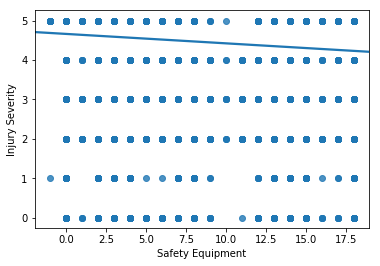

In [31]:
# Correlation between Safety Equipment and Injury Severity
sns.regplot(x=df["Safety Equipment"], y=df["Injury Severity"])

In [ ]:
sns.boxplot(x="Safety Equipment",y="Injury Severity",hue="Sex",data=df, palette="coolwarm")

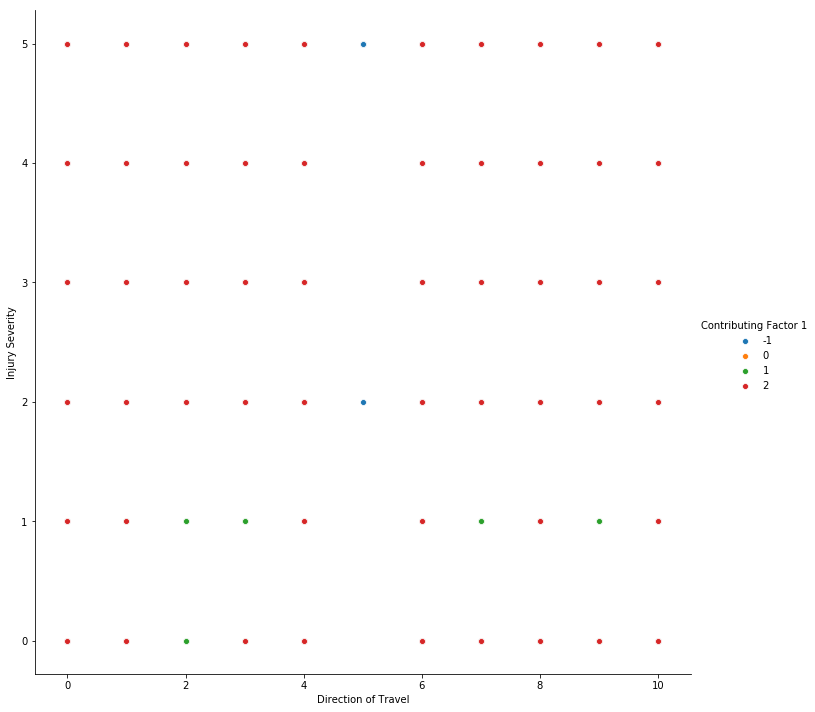

In [34]:
sns.pairplot(x_vars="Direction of Travel", y_vars="Injury Severity", data=df, hue="Contributing Factor 1", size=10)

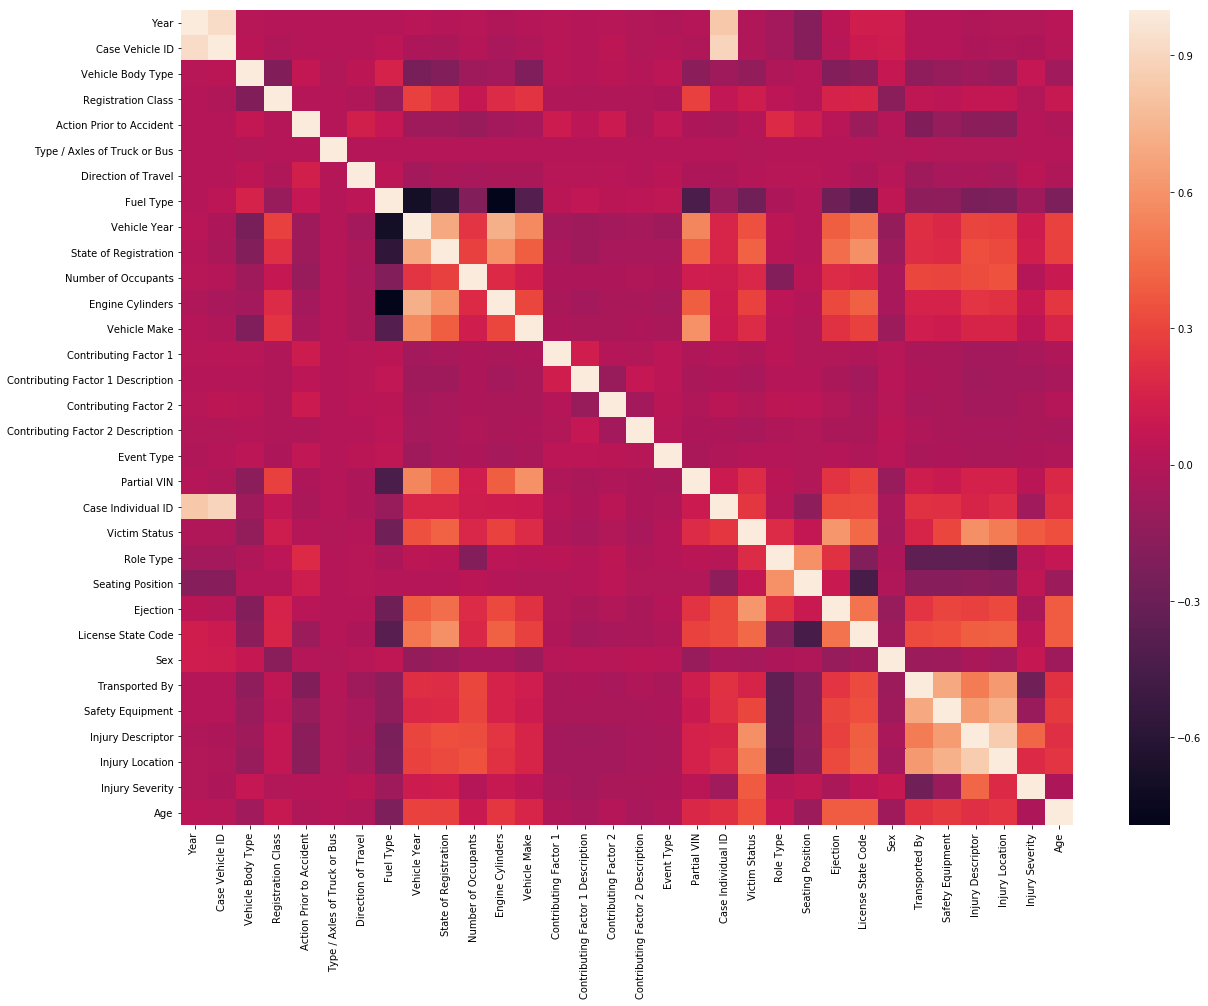

In [39]:
plt.subplots(figsize=(20,15))
heatmap_plot = sns.heatmap(df.corr())
figure = heatmap_plot.get_figure()    
figure.savefig('Correlation Heatmap Figure.png', dpi=400)

In [ ]:
# Create groupings of some features for easier study For example

# 1. Vehicle age at time of crash: Year - Vehicle Year
# 2. No. of occupants : 0, 1, 2, 3, 4, > 4
# 3. Age of Individual: 20-25, 25-30, 30-35, 35-40, 40-50, 50-60, 60+ 
# 4. Safety Equipment: Lap Belt/Harness, Air Bag Deployed, None, Other
# 5. Seating Position: Driver, Passenger Front, Passenger Back: (could determine correlation with Injury Severity)
# 6. Injury Location: Not Applicable (No Injury), Neck, Back, etc.. (correlation with event type?)
# 7. Event Type: collision with vehicle (car, bicycle, motorcycle), collision with fixed object, non-collision

### Creating new variable groupings

In [26]:
def age(x):
    if x < 18:
        return '18-'
    elif 18 <= x <= 25:
        return '18-25'
    elif 25 < x <= 30:
        return '25-30'
    elif 30 < x <= 35:
        return '30-35'
    elif 35 < x <= 40:
        return '35-40'
    elif 40 < x <= 50:
        return '40-50'
    elif 50 < x <= 60:
        return '50-60'
    elif x > 60:
        return '60+'
    else:
        return 'NaN'

df['Age Group'] = df['Age'].apply(age)

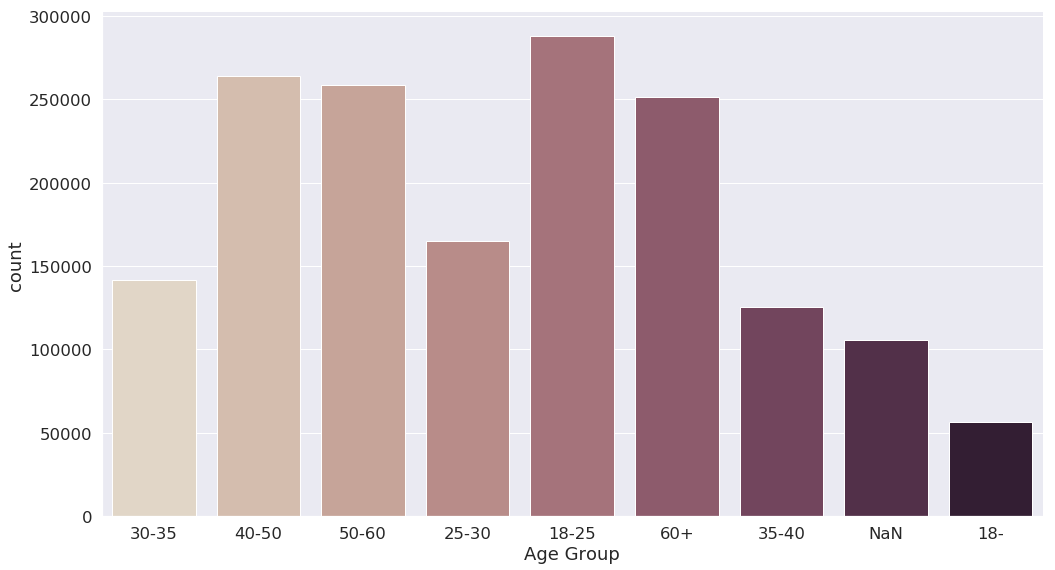

In [27]:
sns.set(rc={'figure.figsize':(18.7,14.27)})
sns.set(font_scale = 1.5)
age_group_plot = sns.catplot(x="Age Group", kind="count", height=8.27, aspect=14.7/8.27, palette="ch:.25", data=df)
age_group_plot.savefig("Age group of individuals in crash.png")

In [28]:
def occupants(x):
    if x > 5:
        return '> 5'
    else:
        return x
    
df['Number of Occupants'] = df['Number of Occupants'].apply(occupants)    

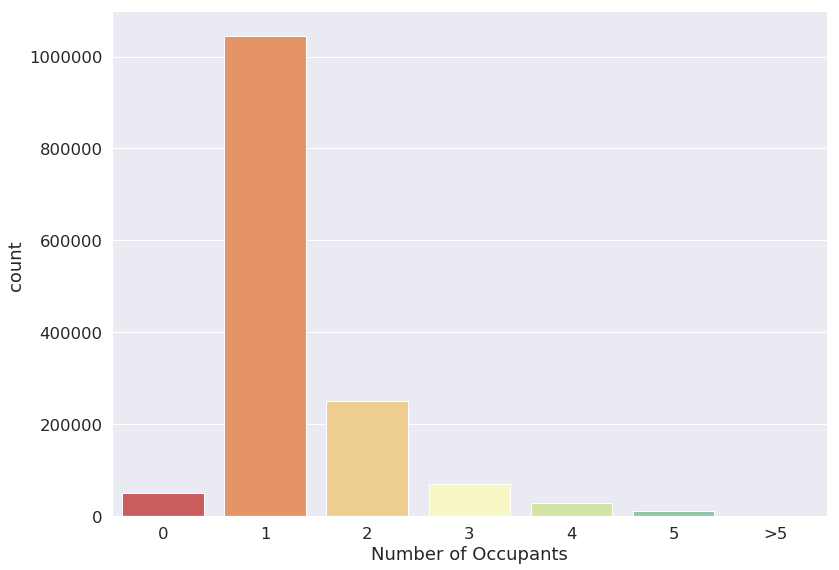

In [29]:
# Bar plot of number of occupants 
sns.set(rc={'figure.figsize':(12.7,14.27)})
sns.set(font_scale = 1.5)
df['Number of Occupants'] = pd.Categorical(df['Number of Occupants'], [0,1,2,3,4,5,'>5'])
df = df.sort_values(['Number of Occupants']).reset_index(drop=True)
noccupants_plot = sns.catplot(x="Number of Occupants", kind="count", height=8.27, aspect=11.7/8.27, palette="Spectral", data=df);
noccupants_plot.savefig("Number of Occupants Bar Plot.png")

In [30]:
# Create new column with age of vehicle at time of crash
df['Vehicle Age'] = df['Year'] - df['Vehicle Year']

In [31]:
# Function to create vehicle age groups
def vehicle_age_group(x):
    if x <= 10:
        return x
    elif 10 < x <= 15:
        return '10-15'
    elif 15 < x <= 20:
        return '15-20'
    elif x > 20:
        return '> 20'
    else:
        return 'NaN'

df['Vehicle Age Group'] = df['Vehicle Age'].apply(vehicle_age_group)

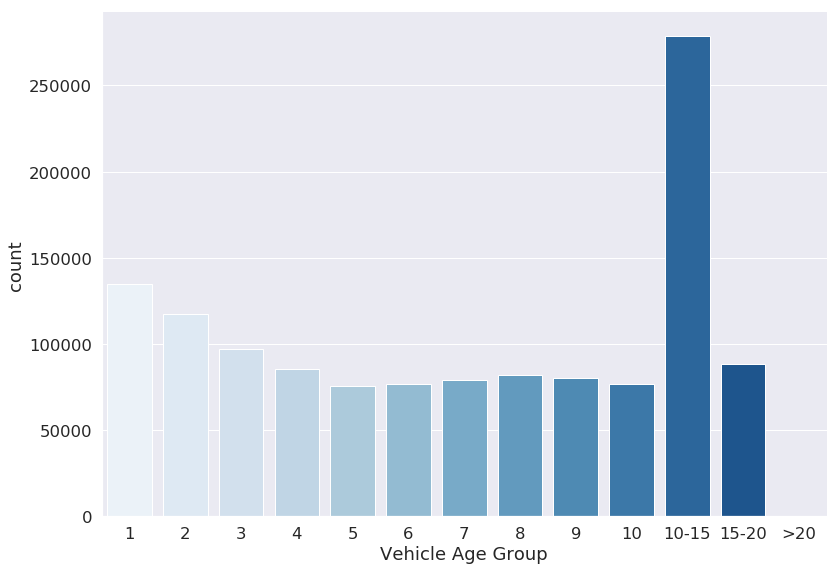

In [32]:
# Bar plot of vehicle age
sns.set(rc={'figure.figsize':(12.7,14.27)})
sns.set(font_scale = 1.5)
# Order the age groups due to different types in the group items
df['Vehicle Age Group'] = pd.Categorical(df['Vehicle Age Group'], [1,2,3,4,5,6,7,8,9,10,'10-15','15-20','>20'])
df = df.sort_values(['Vehicle Age Group']).reset_index(drop=True)
vehicle_age_plot = sns.catplot(x="Vehicle Age Group", kind="count", height=8.27, aspect=11.7/8.27, palette="Blues", data=df)
vehicle_age_plot.savefig("Vehicle Age Bar Plot.png")

In [33]:
df['Safety Equipment'].value_counts()

Lap Belt/Harness                           1037867
Unknown                                     135276
Air Bag Deployed/Lap Belt/Harness            69218
Lap Belt                                     55135
Not Applicable                               50026
Not Entered                                  28324
None                                         27367
Harness                                      23094
Helmet (motorcycle only)                     11704
Child Restraint Only                          7701
Air Bag Deployed                              7193
Air Bag Deployed/Lap Belt                     4921
Air Bag Deployed/Harness                      3024
In-line Skates Bicyclist(Helmet Only)         2857
Other*                                         677
In-line Skates Bicyclist(Helmet/Other)         318
Air Bag Deployed/Child Restraint               180
In-line Skates Bicyclist(Stoppers Only)         84
In-line Skates Bicyclist(Pads Only)             11
Name: Safety Equipment, dtype: 

In [34]:
# Function to group the different safety equipments into categories
def safety(x):
    if (x == 'Air Bag Deployed/Lap Belt/Harness' or x == 'Air Bag Deployed' 
        or x == 'Air Bag Deployed/Lap Belt' or x == 'Air Bag Deployed/Harness' 
        or x == 'Air Bag Deployed/Child Restraint'):
        return 'Air Bag Deployed'
    elif (x == 'Lap Belt/Harness' or x == 'Lap Belt' or x == 'Harness'):
        return 'Lap Belt or Harness'
    elif (x == 'In-line Skates Bicyclist(Helmet Only)' or x == 'In-line Skates Bicyclist(Helmet/Other)' 
          or x == 'In-line Skates Bicyclist(Stoppers Only)' or x == 'In-line Skates Bicyclist(Pads Only)'
          or x == 'Helmet (motorcycle only)'):
        return 'Bicyclist/Motorcycle'
    else:
        return x

df['Safety Equipment'] = df['Safety Equipment'].apply(safety)

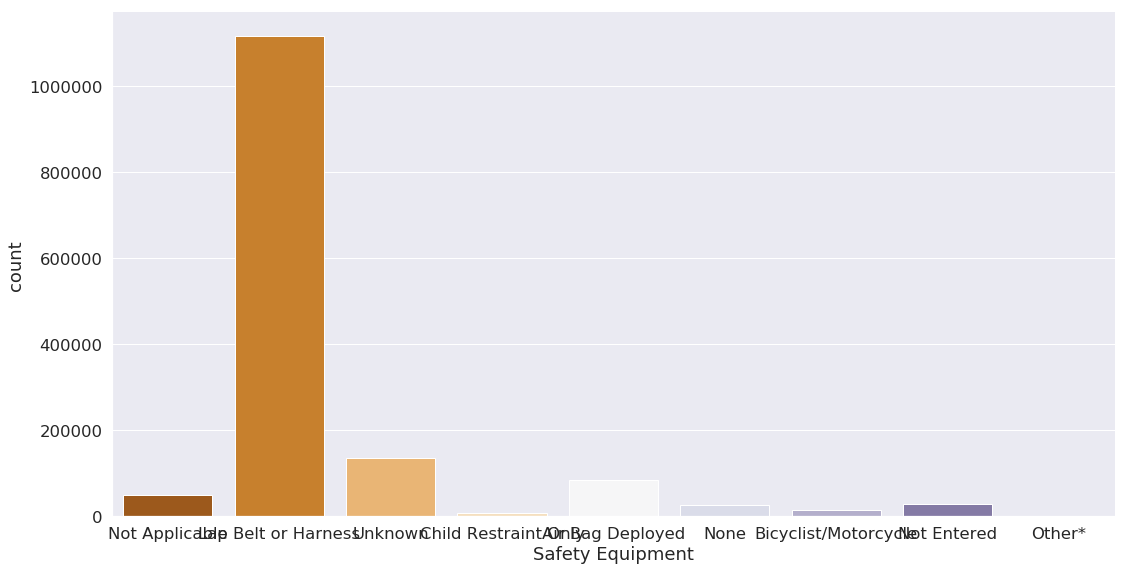

In [35]:
# Barplot of safety equipment used
sns.set(rc={'figure.figsize':(15.7,14.27)})
sns.set(font_scale = 1.5)
#df['Safety Equipment'] = pd.Categorical(df['Vehicle Age Group'], [1,2,3,4,5,6,7,8,9,10,'10-15','15-20','>20'])
sns.catplot(x="Safety Equipment", kind="count", height=8.27, aspect=15.7/8.27, palette="PuOr", data=df);

In [36]:
df['Action Prior to Accident'].value_counts()

Going Straight Ahead          771758
Stopped in Traffic            133903
Making Left Turn              126515
Slowing or Stopping           123514
Parked                        109623
Unknown                       107389
Making Right Turn              54130
Backing                        51917
Not Applicable                 46924
Changing Lanes                 36653
Starting in Traffic            23124
Merging                        12746
Overtaking/Passing             11980
Other                          10725
Starting from Parking          10546
Making U Turn                   8326
Entering Parked Position        7273
Avoiding Object in Roadway      5480
Making Right Turn on Red         935
Making Left Turn on Red          495
Police Pursuit                   489
Not Entered                       23
Name: Action Prior to Accident, dtype: int64

In [ ]:
# Draw a categorical scatterplot to show each observation
#sns.swarmplot(x="Age", y="Injury Severity", hue="Contributing Factor 1", palette=["r", "c", "y"], data=df)
#sns.boxplot(x="day",y="total_bill",hue="smoker",data=t, palette="coolwarm")
#sns.pairplot(x_vars="Direction of Travel", y_vars="Injury Severity", data=df, hue="Contributing Factor 1", size=10)

In [ ]:
# Correlation between Safety Equipment and Injury Severity
sns.regplot(x=df["Safety Equipment"], y=df["Injury Severity"])